# 3. Single-layer Neural Network with Pattern images based on Lengyel-Epstein model
- Optimizer : Adam

## 1) Import Packages

In [2]:
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import math
import sklearn.metrics as metrics

## 2) Make Dataset

In [3]:
# Make dataset (144)
x_orig = []
y_orig = np.zeros((1,48))
for i in range(1,145):
    if i <= 48 :
        folder = 0
    elif i <=96 :
        folder = 1
    else:
        folder = 2

    img = Image.open('144/{0}/pattern_{1}.jpg'.format(folder,i)) 
    data = np.array(img)
    x_orig.append(data)

for i in range(1,3):
    y_orig = np.append(y_orig, np.full((1, 48),i), axis = 1)

In [37]:
# Make dataset(360)
x_orig = []
y_orig = np.zeros((1,120))
for i in range(1,361):
    if i <= 120 :
        folder = 0
    elif i <=240 :
        folder = 1
    else:
        folder = 2

    img = Image.open('360/{0}/pattern_{1}.jpg'.format(folder,i)) 
    data = np.array(img)
    x_orig.append(data)

for i in range(1,3):
    y_orig = np.append(y_orig, np.full((1, 120),i), axis = 1)

In [66]:
# Make dataset(720)
x_orig = []
y_orig = np.zeros((1,240))
for i in range(1,721):
    if i <= 240 :
        folder = 0
    elif i <=480 :
        folder = 1
    else:
        folder = 2

    img = Image.open('720/{0}/pattern_{1}.jpg'.format(folder,i)) 
    data = np.array(img)
    x_orig.append(data)

for i in range(1,3):
    y_orig = np.append(y_orig, np.full((1, 240),i), axis = 1)

In [103]:
x_orig = np.array(x_orig)
print(x_orig.shape)
print(y_orig.shape)  

(1440, 64, 64)
(1, 1440)


In [104]:
# Random shuffle
s = np.arange(x_orig.shape[0])
np.random.shuffle(s)

x_shuffle = x_orig[s,:]
y_shuffle = y_orig[:,s]

print(x_shuffle.shape)
print(y_shuffle.shape)
# y_shuffle

(1440, 64, 64)
(1, 1440)


In [105]:
# Split train and test datasets
x_train_orig, x_test_orig, y_train_orig, y_test_orig = train_test_split(x_shuffle,y_shuffle.T, 
                                                                        test_size=0.3,  shuffle=True, random_state=1004)

In [106]:
print(x_train_orig.shape)
print (y_train_orig.shape)

(1008, 64, 64)
(1008, 1)


In [107]:
print(sum(y_train_orig==0))
print(sum(y_train_orig==1))
print(sum(y_train_orig==2))

[340]
[339]
[329]


In [108]:
# Flatten the training and test images
x_train_flatten = x_train_orig.reshape(x_train_orig.shape[0], -1).T
x_test_flatten = x_test_orig.reshape(x_test_orig.shape[0], -1).T

# Normalize image vectors
x_train = x_train_flatten/255.
x_test = x_test_flatten/255.

# Convert training and test labels to one hot matrices
enc = OneHotEncoder()
y1 = y_train_orig.reshape(-1,1)
enc.fit(y1)
y_train = enc.transform(y1).toarray()
y_train = y_train.T

y2 = y_test_orig.reshape(-1,1)
enc.fit(y2)
y_test = enc.transform(y2).toarray()
y_test = y_test.T

# Explore dataset 
print ("number of training examples = " + str(x_train.shape[1]))
print ("number of test examples = " + str(x_test.shape[1]))
print ("x_train shape: " + str(x_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))

number of training examples = 1008
number of test examples = 432
x_train shape: (4096, 1008)
y_train shape: (3, 1008)
x_test shape: (4096, 432)
y_test shape: (3, 432)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

## 3) Define required functions

In [109]:
def initialize_parameters(nx, ny):

    np.random.seed(1)

    W = np.random.randn(ny,nx)*0.01
    b = np.zeros((ny,1))

    assert(W.shape == (ny, nx))
    assert(b.shape == (ny, 1))

    
    return W, b  

In [110]:
def softmax(Z):
    # compute the softmax activation
    
    S = np.exp(Z + np.max(Z)) / np.sum(np.exp(Z + np.max(Z)), axis = 0)
    
    return S

In [111]:
def classlabel(Z):
    # probabilities back into class labels
    y_hat = Z.argmax(axis=0)
    
    return y_hat

In [112]:
def propagate(W, b, X, Y):

    m = X.shape[1]
#     n = Y.shape[0]
    
    # Forward Propagation
    Z = np.dot(W, X)+ b
    A = softmax(Z)     # compute activation
    
    cost = (-1/m) * np.sum(Y * np.log(A))  # compute cost (Cross_entropy)

    # Backward propagation   
    dW = (1/m) * (np.dot(X,(A-Y).T)).T
    db = (1/m) * (np.sum(A-Y))
    
#     assert(dW.shape == W.shape)
#     assert(db.dtype == float)
#     cost = np.squeeze(cost)
#     assert(cost.shape == (Y.shape[0],1))
    
    grads = {"dW": dW,
             "db": db}
    
    return grads, cost

## 4) Single-Layer Neural Network with Adam

In [113]:
def optimize(X, Y, num_iterations, learning_rate, t, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, print_cost = False):

    costs = []
    W, b = initialize_parameters(4096,3)     
    v_dW = np.zeros((W.shape[0],W.shape[1]))
    v_db = np.zeros((b.shape[0],b.shape[1]))
    s_dW = np.zeros((W.shape[0],W.shape[1]))
    s_db = np.zeros((b.shape[0],b.shape[1]))

    
    for i in range(num_iterations):

        grads, cost = propagate(W, b, X, Y)

        dW = grads["dW"]
        db = grads["db"]
        
        # update parameters with adam
        v_dW = beta1 * v_dW + (1-beta1) * dW
        v_db = beta1 * v_db + (1-beta1) * db

        # Compute bias-corrected first moment estimate
        v_corrected_dW = v_dW / (1-beta1**t)
        v_corrected_db = v_db / (1-beta1**t)
        
        # Moving average of the squared gradients
        s_dW = beta2 * s_dW + (1-beta2) * dW ** 2
        s_db = beta2 * s_db + (1-beta2) * db ** 2

        # Compute bias-corrected second raw moment estimate.
        s_corrected_dW = s_dW / (1-beta2**t)
        s_corrected_db = s_db / (1-beta2**t)

        # Update parameters
        W = W - (learning_rate) * ((v_corrected_dW) / (s_corrected_dW **(1/2) + epsilon))
        b = b - (learning_rate) * ((v_corrected_db) / (s_corrected_db ** (1/2) + epsilon))

        # Record the costs for plotting
        if i % 200 == 0:
            costs.append(cost)
            
        # Print the cost every 100 training iterations
        if print_cost and i % 200 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per 200)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    # Lets save the trainded parameters in a variable
    params = {"W": W,
              "b": b}    
    grads = {"dW": dW,
             "db": db}
    
    return params, grads, costs

Cost after iteration 0: 1.125712
Cost after iteration 200: 0.972883
Cost after iteration 400: 0.943104
Cost after iteration 600: 0.921929
Cost after iteration 800: 0.904306
Cost after iteration 1000: 0.888661
Cost after iteration 1200: 0.874213
Cost after iteration 1400: 0.860477
Cost after iteration 1600: 0.852081
Cost after iteration 1800: 0.840238


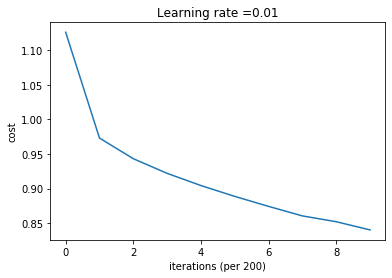

W = [[-0.11559258  0.03054121 -0.02244723 ...  0.07945249  0.06754238
   0.01908661]
 [ 0.01658118  0.02501642  0.0415868  ... -0.06590331 -0.05152393
  -0.02081043]
 [ 0.11973439 -0.00019413 -0.00020599 ... -0.01376429  0.01650675
   0.04933773]]
b = [[5.17021983e-09]
 [5.17021983e-09]
 [5.17021983e-09]]
dw = [[ 0.00933609  0.00858495  0.00894703 ...  0.00879279  0.00895288
   0.00930909]
 [-0.00403497 -0.00396879 -0.00414603 ... -0.00383869 -0.00381587
  -0.00405163]
 [-0.00530112 -0.00461616 -0.00480099 ... -0.00495411 -0.00513701
  -0.00525746]]
db = -7.04903507698512e-18


In [118]:
params, grads, costs = optimize(x_train, y_train, num_iterations=2000, learning_rate=0.01,
                                t=2, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, print_cost = True)

print ("W = " + str(params["W"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dW"]))
print ("db = " + str(grads["db"]))

## 5) Accuracy analysis

In [119]:
def predict(W, b, X) :

    m = X.shape[1]
    
    # Compute "A" predicting the probabilities
    Z = np.dot(W, X)+ b
    A = softmax(Z) 

    # Convert probabilities A to actual predictions
    y_prediction = A.argmax(axis=0)
    
#     assert(y_prediction.shape == (1, m))
    
    return y_prediction

In [120]:
w1 = params['W']
b1 = params['b']
y_prediction_train = predict(w1, b1, x_train)
y_prediction_test = predict(w1, b1, x_test)
print(y_prediction_train)
print(y_prediction_test)
# Print train/test Errors
print("train accuracy : ", metrics.accuracy_score(y_prediction_train, y_train_orig))
print("test accuracy : ", metrics.accuracy_score(y_prediction_test, y_test_orig))

[2 1 2 ... 0 2 1]
[1 1 0 2 1 2 0 1 0 2 1 0 0 2 1 2 2 2 1 1 0 0 2 2 0 0 1 2 1 0 0 2 0 2 0 2 0
 0 1 1 2 2 0 2 0 0 1 1 1 1 0 2 0 1 1 0 0 2 2 1 2 1 0 1 2 0 0 1 0 0 0 0 1 0
 0 2 1 1 0 1 0 0 0 0 0 2 1 1 0 0 2 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 1 0
 0 2 2 1 0 0 2 1 1 0 0 0 1 2 0 0 2 0 2 2 1 2 0 0 1 0 1 2 1 1 1 1 2 0 0 2 0
 1 2 0 0 0 0 0 1 2 0 0 2 2 2 0 1 0 1 2 1 1 0 0 0 0 1 0 1 1 0 0 2 1 0 0 0 1
 0 2 0 2 1 2 2 2 0 0 1 0 0 1 0 0 0 0 0 0 1 2 0 0 0 1 2 2 1 2 2 1 1 1 0 2 2
 2 0 2 0 2 1 1 0 1 0 1 1 0 1 1 2 0 0 2 1 1 2 2 0 0 2 0 2 2 1 1 0 0 0 0 0 1
 1 2 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 2 2 0 1 2 0 0 0 2 1 0 2 2 1 1
 2 1 1 0 1 2 0 0 1 1 0 0 2 0 2 0 1 0 0 0 0 0 0 2 1 2 0 2 1 2 0 1 1 0 2 1 0
 1 1 0 2 0 1 2 2 0 2 0 0 0 0 0 2 1 0 0 0 2 1 0 2 0 1 0 1 2 0 0 0 0 1 2 0 2
 2 1 0 1 1 1 1 0 0 0 1 0 0 2 2 0 0 0 0 2 1 1 0 1 2 0 1 0 0 0 0 2 0 0 1 2 2
 1 0 2 0 1 1 0 1 0 0 0 0 2 0 1 2 2 0 1 1 0 0 0 1 1]
train accuracy :  0.7123015873015873
test accuracy :  0.4398148148148148
